# Data analysis exercise 1
## SC385 Spring Term, 2020–2021

In this data analysis exercise, you will use Python and related libraries for data analysis and visualisation to study the anonymised and aggregated dataset [Covid-19 Google Community Mobility Reports](https://www.google.com/covid19/mobility/). We use the data as an example of large open data source. The data display human mobility trends over time by country and region, across different categories of places, including retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential. For each place in a region, the data display the percentage change in visits for the reported date compared to a baseline period in early 2020. Mobility changes are reported as a positive or negative percentages.

To perform your analysis, import the following Python libraries and modules: 
`pandas`, `numpy`, `seaborn`, `matplotlib.pyplot`, `stats` from `scipy`, and `date` from `datetime`.

To create a reproducible research report, use throughout the notebook:
* Python code in Code cells
* hashtag symbol `#` in Code cells to introduce a comment line describing your Python code
* Markdown language in Text cells to write up your methods, results, and interpretation.

Before submission, please `Restart and run all` (under `Runtime` in the Colab menu bar) to make sure that your data analysis is computationally reproducible.

You need to submit your notebook by 10am on 26 February 2021 on FASER. You can download your Colab notebook from `File` and then `Download .ipynb`, and submit on FASER your downloaded notebook. Your notebook would contain approximately ~1000 words, including computer code (excluding the description of the tasks in this template). 

Feel free to reuse code from your Colab notebook with weekly exercises as well as from the course Colab notebooks. You are also encouraged to consult and refer to online tutorials and sources, including [DataCamp](https://learn.datacamp.com/courses/introduction-to-data-science-in-python) courses and [Stack Overflow](https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot). You can refer to such sources by providing links pointing to them similar to the links to DataCamp and Stack Overflow in the previous sentence.        

### Task 1

Analyse how countries differ in their mobility trends. Use the `catplot` function to visualise mobility trends across the six mobility categories for a set of five countries of your choice. Provide a brief interpretation of the results focusing on differences between countries and on mobility categories that differentiate (or not) the countries you selected.   

_Level of analysis:_ country

_Variables:_ all six mobility categories

_Descriptive statistics:_ median (no need to compute this separately, you will get it from the boxplot)

_Plotting:_ boxplots via the `catplot` function in `seaborn`


In [5]:
# Code relating to Task 1 is inserted here. Text and code cells have been added when necessary.

# Import libraries

# Data analysis
import pandas as pd

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics libraries
from scipy import stats

from datetime import date

sns.set_theme()

In [6]:
# Load the data
MobilityTrends = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#Examinings the names of the columns
MobilityTrends.columns.unique

<bound method Index.unique of Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')>

In [8]:
MobilityTrends.rename(columns={'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation',
       'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
       'parks_percent_change_from_baseline':'parks',
       'transit_stations_percent_change_from_baseline':'transit_stations',
       'workplaces_percent_change_from_baseline':'workplaces',
       'residential_percent_change_from_baseline':'residential'},inplace=True)

In [9]:
MobilityTrends.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [10]:
MobilityTrends_SelectedCountries = MobilityTrends[MobilityTrends['country_region'].isin(['Barbados','Brazil','Canada','Ghana','India'])]

MobilityTrends_SelectedCountries

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
296540,BB,Barbados,NaN,NaN,NaN,NaN,NaN,ChIJoxoyrvvxQ4wRKzb0jLNR7A4,2020-02-15,1.0,0.0,4.0,2.0,0.0,0.0
296541,BB,Barbados,NaN,NaN,NaN,NaN,NaN,ChIJoxoyrvvxQ4wRKzb0jLNR7A4,2020-02-16,4.0,4.0,5.0,0.0,1.0,0.0
296542,BB,Barbados,NaN,NaN,NaN,NaN,NaN,ChIJoxoyrvvxQ4wRKzb0jLNR7A4,2020-02-17,-4.0,-5.0,0.0,4.0,1.0,1.0
296543,BB,Barbados,NaN,NaN,NaN,NaN,NaN,ChIJoxoyrvvxQ4wRKzb0jLNR7A4,2020-02-18,-2.0,-3.0,-5.0,1.0,2.0,1.0
296544,BB,Barbados,NaN,NaN,NaN,NaN,NaN,ChIJoxoyrvvxQ4wRKzb0jLNR7A4,2020-02-19,-7.0,-5.0,-18.0,-3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102634,IN,India,West Bengal,West Medinipur,NaN,NaN,NaN,ChIJJXVMlY9CHToR4mlOVIq_xDQ,2021-02-17,-21.0,8.0,8.0,-1.0,-15.0,10.0
2102635,IN,India,West Bengal,West Medinipur,NaN,NaN,NaN,ChIJJXVMlY9CHToR4mlOVIq_xDQ,2021-02-18,-19.0,10.0,6.0,2.0,3.0,10.0
2102636,IN,India,West Bengal,West Medinipur,NaN,NaN,NaN,ChIJJXVMlY9CHToR4mlOVIq_xDQ,2021-02-19,-22.0,5.0,6.0,-7.0,-3.0,12.0
2102637,IN,India,West Bengal,West Medinipur,NaN,NaN,NaN,ChIJJXVMlY9CHToR4mlOVIq_xDQ,2021-02-20,-19.0,8.0,9.0,-4.0,1.0,11.0


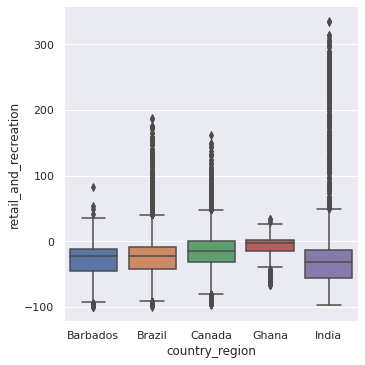

In [11]:
sns.catplot(x = 'country_region', y = 'retail_and_recreation', kind = 'box', 
            data = MobilityTrends_SelectedCountries)

Interpretation of these results can be found down below.

In [12]:
my_vars = ['retail_and_recreation',
                                               'grocery_and_pharmacy',
                                               'parks',
                                               'transit_stations',
                                               'workplaces',
                                               'residential']
my_vars                                               

['retail_and_recreation',
 'grocery_and_pharmacy',
 'parks',
 'transit_stations',
 'workplaces',
 'residential']

In [13]:
for variable in my_vars:
  print(variable)

retail_and_recreation
grocery_and_pharmacy
parks
transit_stations
workplaces
residential


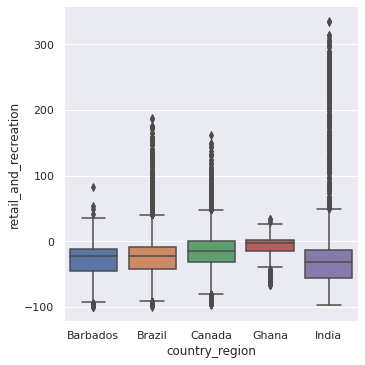

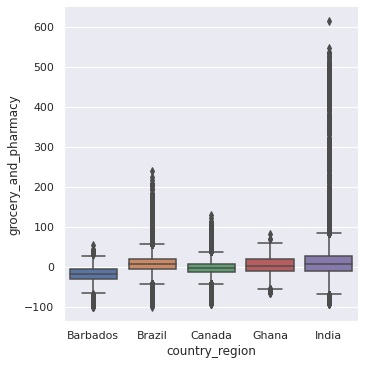

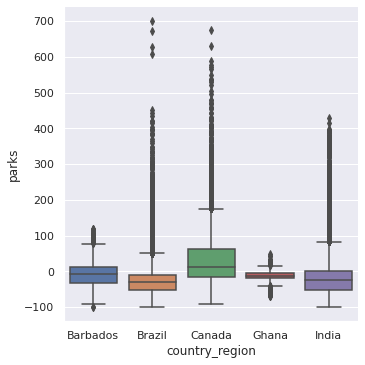

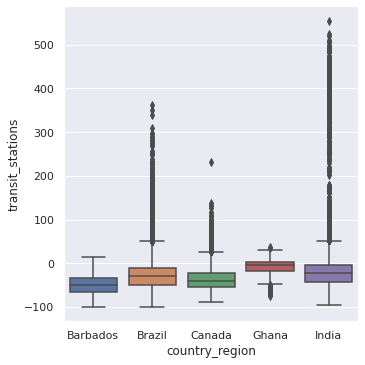

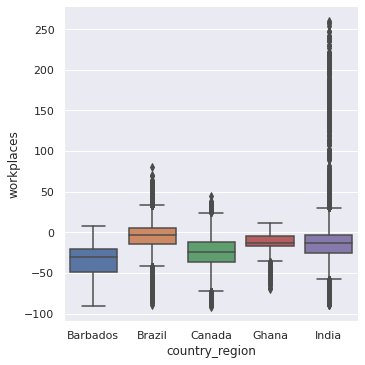

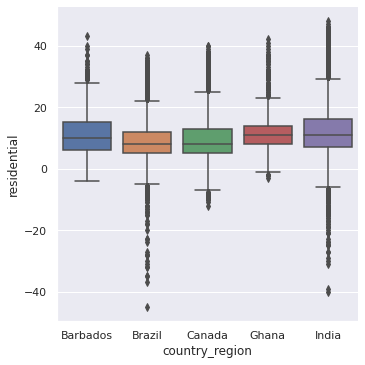

In [14]:
for variable in my_vars: sns.catplot(x = 'country_region', y = variable, kind= 'box', data = MobilityTrends_SelectedCountries)

Brieft interpretation of results

It is important to note that not every aforementioned graph has been interpreted due to word limit constraints.

From observing the results of the retail_and_recreation category we can see that the medians for each of the countries are not that disimilar, however, Ghana's is still the highest, suggesting more mobility. Ghana's mean relative human mobility varies much less than that of the other selected countries; The interquartile range is also much smaller for Ghana than the other countries, thus meaning the results are more consistent and less scattered.

For the grocery_and_pharmacy category, the results for each country are closer together than that of the previous category, with all medians, whiskers and interquartile range boxes being relatively equal in size. However, one can see that Brazil has the highest median and Canada has the smallest interquartile range box and whiskers. Additionally, India has the higest global mobility percentage when not accounting for outliers, as can be seen by the upper whiskers. Nevertheless, India also has a great number of outliers that have most likely had an impact on the results.It is also worth noting that the whiskers for most countries are relatively equal on both sides of the interquatile box, indicating a symmetric distribution where the mean is similar or equal to the median. On the other hand, for Canada, the median is closer to the bottom of the box, suggesting a positive skew and a mean that is greater than the median.

In [15]:
MobilityTrends_SelectedCountries.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
296540,BB,Barbados,NaN,NaN,NaN,NaN,NaN,ChIJoxoyrvvxQ4wRKzb0jLNR7A4,2020-02-15,1.0,0.0,4.0,2.0,0.0,0.0
296541,BB,Barbados,NaN,NaN,NaN,NaN,NaN,ChIJoxoyrvvxQ4wRKzb0jLNR7A4,2020-02-16,4.0,4.0,5.0,0.0,1.0,0.0
296542,BB,Barbados,NaN,NaN,NaN,NaN,NaN,ChIJoxoyrvvxQ4wRKzb0jLNR7A4,2020-02-17,-4.0,-5.0,0.0,4.0,1.0,1.0
296543,BB,Barbados,NaN,NaN,NaN,NaN,NaN,ChIJoxoyrvvxQ4wRKzb0jLNR7A4,2020-02-18,-2.0,-3.0,-5.0,1.0,2.0,1.0
296544,BB,Barbados,NaN,NaN,NaN,NaN,NaN,ChIJoxoyrvvxQ4wRKzb0jLNR7A4,2020-02-19,-7.0,-5.0,-18.0,-3.0,1.0,2.0


In [16]:
MobilityTrends_SelectedCountries_long = pd.melt(MobilityTrends_SelectedCountries, id_vars=['country_region', 'date'], 
        value_vars = MobilityTrends_SelectedCountries.loc[:,['retail_and_recreation',
                                               'grocery_and_pharmacy',
                                               'parks',
                                               'transit_stations',
                                               'workplaces',
                                               'residential']])

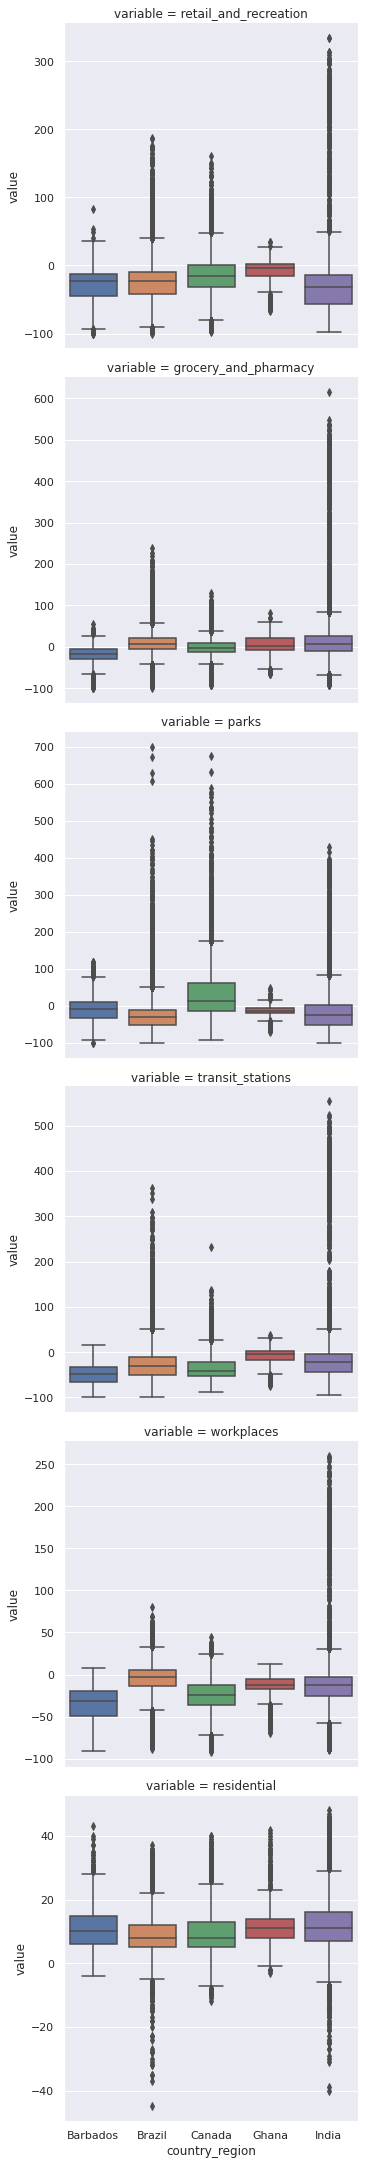

In [17]:
sns.catplot(x = 'country_region',
            y = 'value',
            row = 'variable',
            kind = 'box',
            sharey = False,
            data = MobilityTrends_SelectedCountries_long)

### Task 2
Analyse the mobility changes in the United Kingdom during the second lockdown, 5 November - 2 December 2020. Perform the following analysis and visualisation: 
1. After selecting data about the UK, use the `catplot` function for ploting categorical variables in `seaborn` to plot workplaces mobility changes across all UK counties. In addition, plot the 99% confidence intervals (CI) using 10,000 bootstrap iterations. Briefly interpret the results and compare your results to the results about the first lockdown discussed in labs.
2. Compute the median mobility change across all UK counties and six mobility categories. Use the median values to fit a linear regression model between the variables `retail_recreation` and `workplaces`. Plot the relationship using the `regplot` function in `seaborn`. Briefly discuss your results.

_Level of analysis:_ UK county

_Variables:_ selected mobility categories and `workplaces` in particular

_Descriptive statistics:_ mean, median, and 99% CI

_Modelling:_ linear regression model

_Plotting:_ `catplot` and `regplot` in `seaborn`

In [18]:
# Insert your code about Taks 2 here. Add both Code cells and Text cells as needed. 

MobilityTrends_Lockdown2 = MobilityTrends[(MobilityTrends['country_region'] == 'United Kingdom') & 
  (MobilityTrends['date'] > '2020-11-05') & (MobilityTrends['date'] <= '2020-12-02')]


MobilityTrends_Lockdown2.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
1585524,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-06,-55.0,-12.0,5.0,-52.0,-38.0,17.0
1585525,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-07,-60.0,-16.0,13.0,-58.0,-28.0,13.0
1585526,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-08,-60.0,-20.0,5.0,-57.0,-28.0,10.0
1585527,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-09,-47.0,-15.0,5.0,-50.0,-39.0,15.0
1585528,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-10,-48.0,-13.0,14.0,-49.0,-39.0,15.0


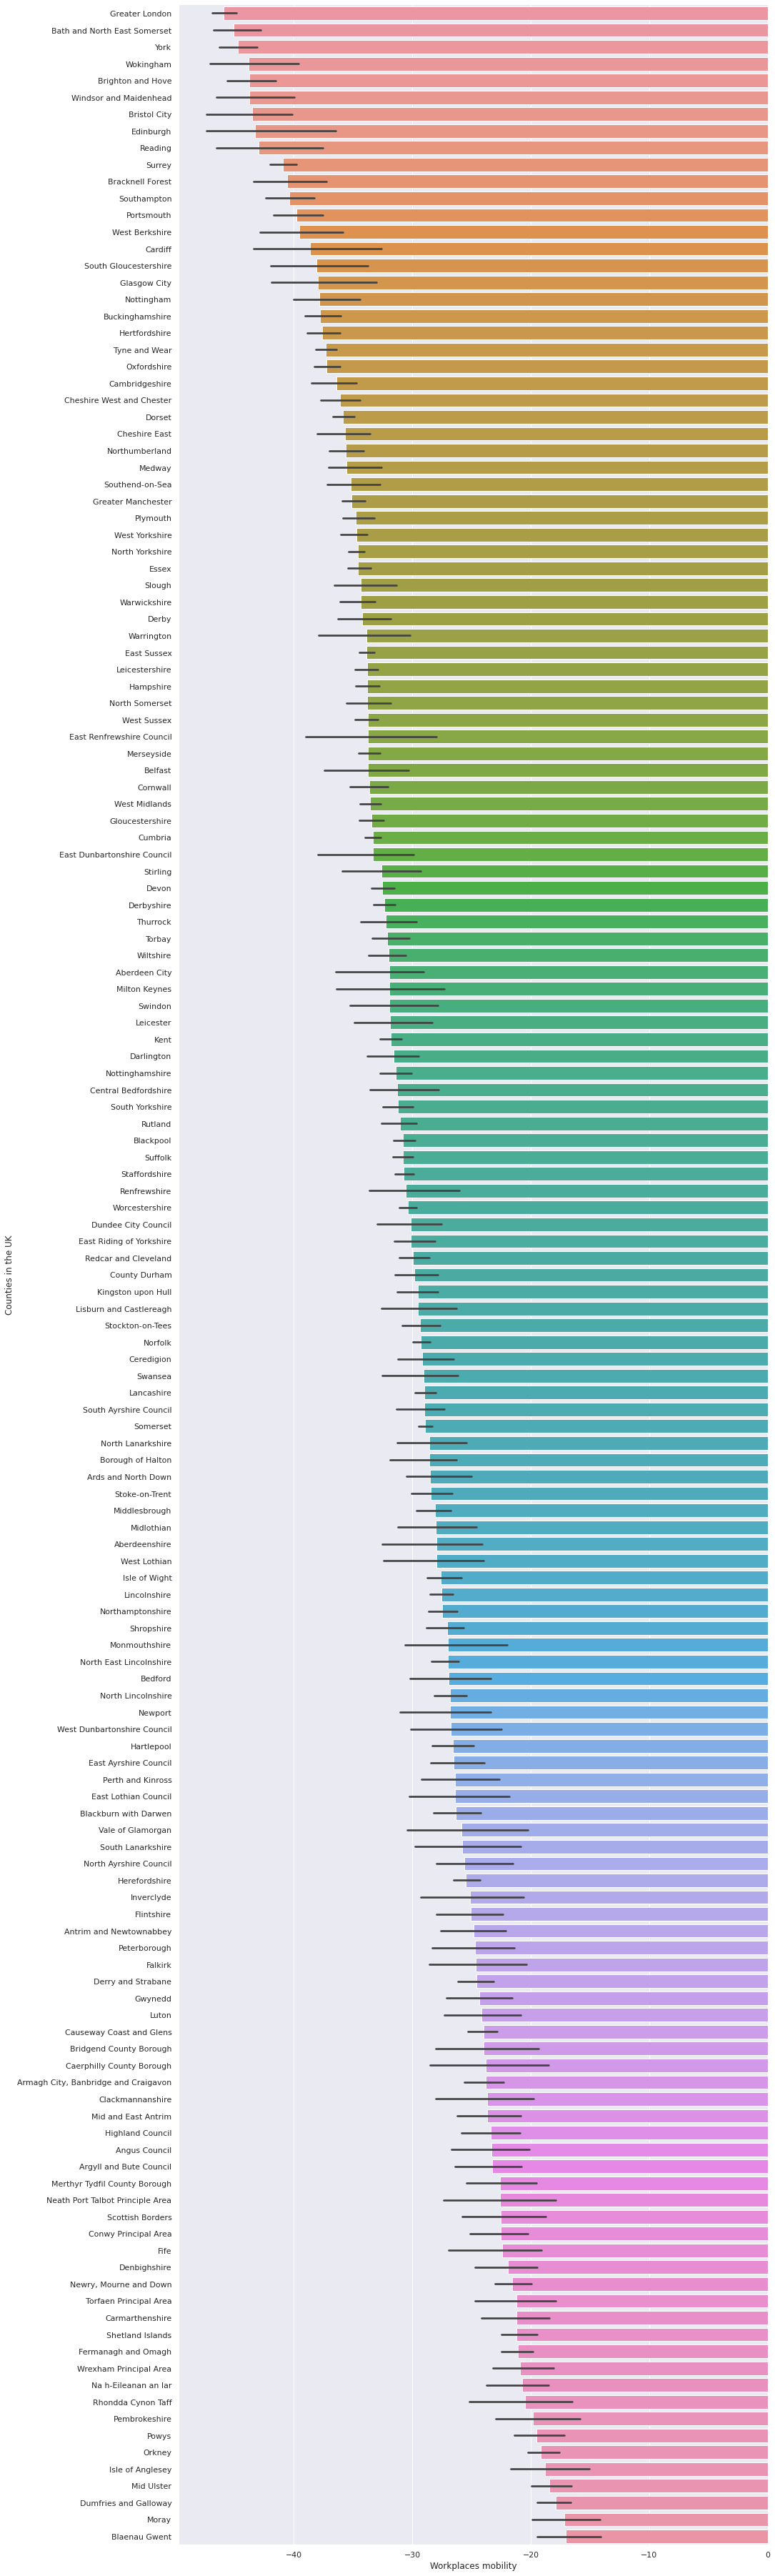

In [19]:
fig1 = sns.catplot(x = 'workplaces', y = 'sub_region_1',kind = 'bar', 
            height = 50, aspect = 0.3,ci=99,n_boot = 100,
            order = MobilityTrends_Lockdown2.groupby('sub_region_1')['workplaces'].mean().sort_values().index,
            data = MobilityTrends_Lockdown2)

fig1.set_axis_labels('Workplaces mobility', 'Counties in the UK')

Mobility trends for the second UK lockdown appear to be much higher when compared to the first UK lockdown, with the highest mobility trends mean for the second lockdown being  around -45, compared to the highest mean of approximately just -85 for the first lockdown. It should be noted that the confidence interval lines appear to be wider for this set of results than for the output displaying the first lockdown results because this time around a confidence interval of 99 was used rather than a confidence interval of 95. This is because, to be more confident that the true population value falls within the interval, one will need to allow more potential values within the interval.


In [20]:
MobilityTrends_Lockdown2.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
1585524,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-06,-55.0,-12.0,5.0,-52.0,-38.0,17.0
1585525,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-07,-60.0,-16.0,13.0,-58.0,-28.0,13.0
1585526,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-08,-60.0,-20.0,5.0,-57.0,-28.0,10.0
1585527,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-09,-47.0,-15.0,5.0,-50.0,-39.0,15.0
1585528,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-10,-48.0,-13.0,14.0,-49.0,-39.0,15.0


In [21]:
MobilityTrends_Lockdown2_median = MobilityTrends_Lockdown2.groupby('sub_region_1')[['retail_and_recreation',
                                               'grocery_and_pharmacy',
                                               'parks',
                                               'transit_stations',
                                               'workplaces',
                                               'residential']].median() 

In [22]:
MobilityTrends_Lockdown2_median.shape

(151, 6)

In [23]:
MobilityTrends_Lockdown2_median_no_na = MobilityTrends_Lockdown2_median[['retail_and_recreation','workplaces']].dropna()
MobilityTrends_Lockdown2_median_no_na.shape

(148, 2)

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(MobilityTrends_Lockdown2_median_no_na['retail_and_recreation'],MobilityTrends_Lockdown2_median_no_na['workplaces'])

In [25]:
slope, intercept, r_value, p_value, std_err

(0.3050371210785076,
 -20.881411184496272,
 0.6640639232329201,
 3.591791294308438e-20,
 0.028423640677664)

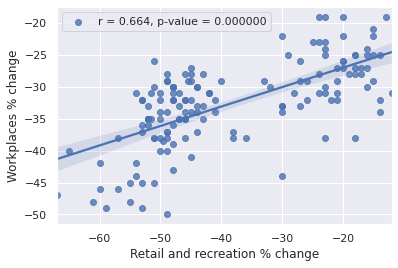

In [26]:
#Regression Model - retail_recreation and workplaces
fig_reg = sns.regplot(x = 'retail_and_recreation', y = 'workplaces', 
                      label = 'r = {0:.3f}, p-value = {1:3f}'.format(r_value,p_value),
                      data = MobilityTrends_Lockdown2_median)
fig_reg.set(xlabel = 'Retail and recreation % change', ylabel = 'Workplaces % change')
fig_reg.legend() 

This regression model shows the relationship between median mobility changes of workplaces and retail and recreation.
from looking at the table and information above, we know that the slope of this regression model is 0.31, indicating that for unit increase in relail and recreation % change, the workplaces % change increases, on average, by 0.31 points. The R-value is 0.66, indicating a moderate positive relationship, or correlation, between workplaces % change and retail and recreation % change. The results are statistically significant (p=0.000), meaning the results can be generalised to the general population.

### Task 3

How do mobility trends change over time in selected UK counties? For a sample of counties (Essex, Kent, York, Suffolk), perform the following computations: 
1. Create a dataframe containing all the data about the counties of interest.
2. Reshape the dataframe from wide to long data format.
3. Aggregate daily mobility trends to monthly mobility trends.
4. Plot the monthly mobility trends across all counties and all mobility categories using the `seaborn` function `relplot`. Plot also the 95% confidence intervals of the mean mobility trends. 

Give a brief interpretation of the results. Determine whether counties differ in their mobility trends and whether those differences are statistically significant based on the 95% confidence intervals (CI).

_Level of analysis:_ UK county

_Variables:_ all six mobility categories

_Descriptive statistics:_ mean and 95% CI using `relplot` (no need to compute mean and 95% separately, jsut interpret the ones you got from the plot you created) 

_Plotting:_ `relplot`


In [45]:
MobilityTrends_OurCounties = MobilityTrends[MobilityTrends['sub_region_1'].isin(['Kent',
                                                                                 'Essex',
                                                                                 'York',
                                                                                 'Suffolk'])]

In [46]:
MobilityTrends_OurCounties.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
1618162,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,ChIJ0w2H_idW2EcReVDuRzjLV0I,2020-02-15,-9.0,-7.0,-27.0,-11.0,-3.0,2.0
1618163,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,ChIJ0w2H_idW2EcReVDuRzjLV0I,2020-02-16,-16.0,-12.0,-45.0,-9.0,-5.0,2.0
1618164,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,ChIJ0w2H_idW2EcReVDuRzjLV0I,2020-02-17,9.0,-1.0,23.0,-1.0,-16.0,3.0
1618165,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,ChIJ0w2H_idW2EcReVDuRzjLV0I,2020-02-18,10.0,-4.0,15.0,0.0,-16.0,2.0
1618166,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,ChIJ0w2H_idW2EcReVDuRzjLV0I,2020-02-19,9.0,-3.0,10.0,1.0,-16.0,2.0


In [40]:
MobilityTrends_OurCounties_long = pd.melt(MobilityTrends_OurCounties, id_vars=['sub_region_1', 'date'], 
        value_vars = MobilityTrends_OurCounties.columns[9:15]) 

In [41]:
MobilityTrends_OurCounties_long

,sub_region_1,date,variable,value
0,Essex,2020-02-15,retail_and_recreation,-9.0
1,Essex,2020-02-16,retail_and_recreation,-16.0
2,Essex,2020-02-17,retail_and_recreation,9.0
3,Essex,2020-02-18,retail_and_recreation,10.0
4,Essex,2020-02-19,retail_and_recreation,9.0
...,...,...,...,...
75865,York,2021-02-17,residential,21.0
75866,York,2021-02-18,residential,23.0
75867,York,2021-02-19,residential,23.0
75868,York,2021-02-20,residential,15.0


**(Off topic question to ask)
Why does it say 'Essex' and 'York' for all the sub regions, and not list the all the counties?** 

In [42]:
MobilityTrends_OurCounties_long.loc[:,'date'] = pd.to_datetime(MobilityTrends_OurCounties_long.loc[:,'date'])
MobilityTrends_OurCounties_long['Month_Year'] = MobilityTrends_OurCounties_long.loc[:,'date'].dt.strftime('%m-%Y')

In [43]:
MobilityTrends_OurCounties_long.head()

,sub_region_1,date,variable,value,Month_Year
0,Essex,2020-02-15,retail_and_recreation,-9.0,02-2020
1,Essex,2020-02-16,retail_and_recreation,-16.0,02-2020
2,Essex,2020-02-17,retail_and_recreation,9.0,02-2020
3,Essex,2020-02-18,retail_and_recreation,10.0,02-2020
4,Essex,2020-02-19,retail_and_recreation,9.0,02-2020


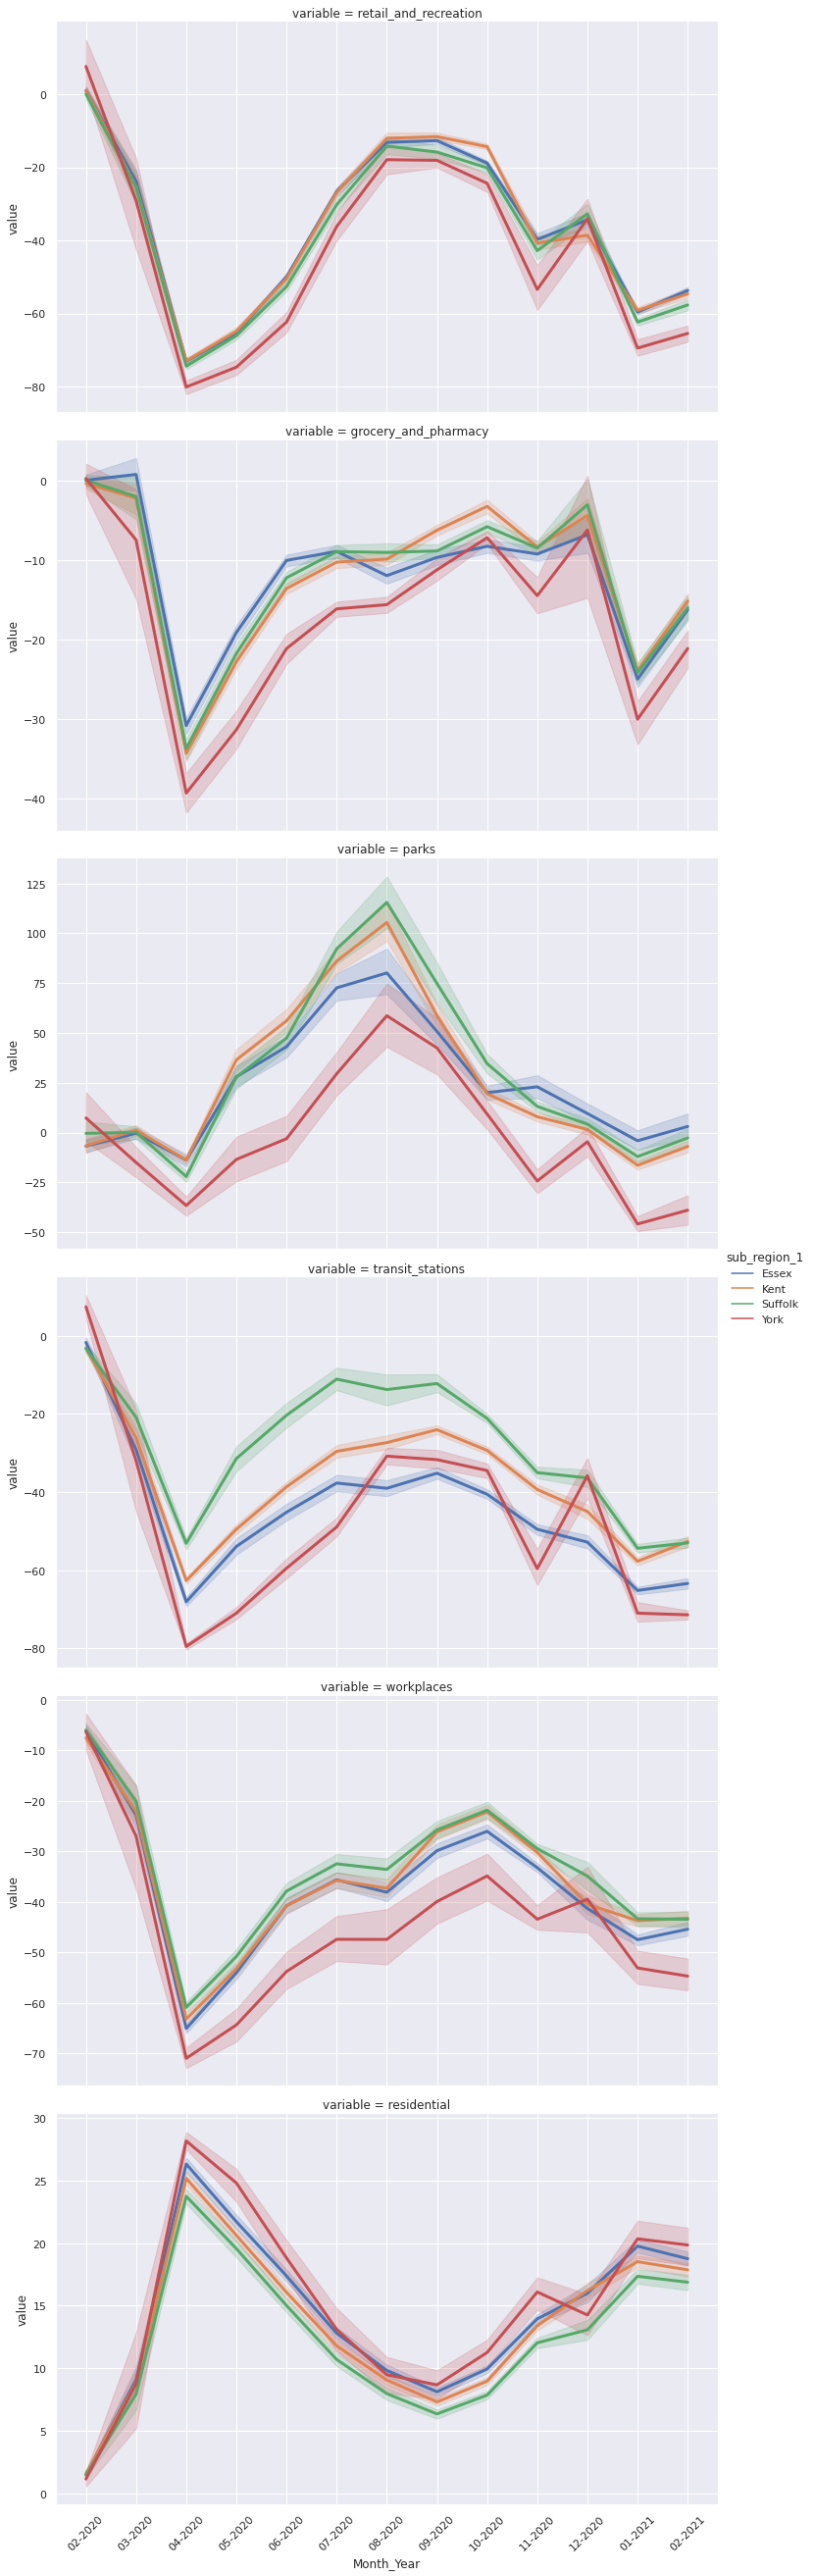

In [54]:
fig2 = sns.relplot(x = 'Month_Year', 
            y = 'value', 
            hue = 'sub_region_1', 
            col='variable', 
            col_wrap= 1,
            kind='line',
            facet_kws={'sharey':False, 'sharex':True},
            height = 6, aspect = 1.7,
            ci = 95, n_boot = 1000,
            linewidth = 3,
            data=MobilityTrends_OurCounties_long)
fig2.set_xticklabels(rotation=45)

From looking at the graphs and information above we can see that each country differs in mobility trends for each category. It should be noted that for each category the line graphs are relatively similar, as can be seen by the lines being close together. However, for the residential and retail and recreation categories, the mobility trends across the selected counties are even closer together. The condifence intervals are also the smallest for transit, indicating a 95% chance that the true value falls within the shaded range, as this shaded range is small it means that the results displayed are rather accurate.
One should note that the partcular trend within these results is that the county York has the largest confidence intervals for each category, suggesting uncertainty within the estimates when the studies are repeated.

In [48]:
sns.relplot?